In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import shutil

rootdir= '/content/drive/MyDrive/Dataset' #path of the original folder

classes = ['allium', 'calendula', 'cattail', 'common_vetch', 'coneflower', 'daisy', 'dandelion', 'gardenia']

for i in classes:
  os.makedirs(rootdir +'/train/' + i)

  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.4

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)
train_datagen

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1400 images belonging to 8 classes.
Found 621 images belonging to 8 classes.


In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(input_shape = (100,150,3), kernel_size=3, filters=16,activation = "relu"),
      
    tf.keras.layers.MaxPooling2D(),
      
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = "relu"),
      
    
    tf.keras.layers.Flatten(),
      
    
    tf.keras.layers.Dense(units = 64, activation = "relu"),
      
    
    tf.keras.layers.Dense(units = 8, activation = "softmax")
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [ ]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 5
)

Epoch 1/50
25/25 [==============================] - 21s 413ms/step - loss: 2.6575 - accuracy: 0.2225 - val_loss: 1.7078 - val_accuracy: 0.4375
Epoch 2/50
25/25 [==============================] - 10s 392ms/step - loss: 1.3969 - accuracy: 0.4962 - val_loss: 1.2999 - val_accuracy: 0.4750
Epoch 3/50
25/25 [==============================] - 10s 393ms/step - loss: 1.0652 - accuracy: 0.6389 - val_loss: 1.1313 - val_accuracy: 0.6000
Epoch 4/50
25/25 [==============================] - 10s 391ms/step - loss: 0.9282 - accuracy: 0.6894 - val_loss: 1.0437 - val_accuracy: 0.6625
Epoch 5/50
25/25 [==============================] - 10s 393ms/step - loss: 0.8125 - accuracy: 0.7100 - val_loss: 1.1839 - val_accuracy: 0.6562
Epoch 6/50
25/25 [==============================] - 10s 416ms/step - loss: 0.7962 - accuracy: 0.7312 - val_loss: 0.9672 - val_accuracy: 0.6875
Epoch 7/50
25/25 [==============================] - 10s 400ms/step - loss: 0.7360 - accuracy: 0.7689 - val_loss: 0.8505 - val_accuracy: 0.6687

In [ ]:
export_dir = '/content/drive/MyDrive/Dataset/saved_model/4'

tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Dataset/saved_model/3/model.tflite')
tflite_model_file.write_bytes(tflite_model)

6943040

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


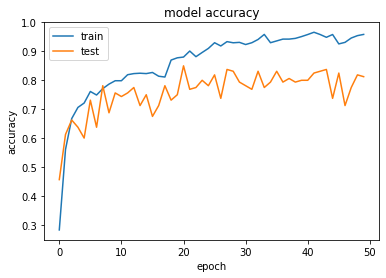

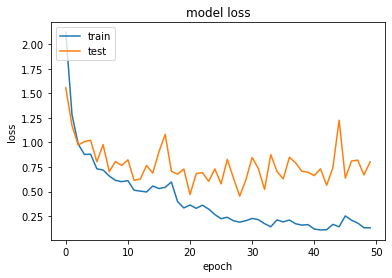

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 60f97c2f836a3.jpg to 60f97c2f836a3.jpg


Hasil Prediksi :  [0. 0. 0. 0. 0. 0. 0. 1.] 

60f97c2f836a3.jpg
gardenia


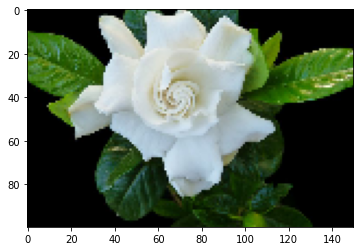

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')
  print(fn)
  if classes[0, 0] == 1:
    print('allium')
  elif classes[0, 1] == 1:
    print('calendula')
  elif classes[0, 2] == 1:
    print('cattail')
  elif classes[0, 3] == 1:
    print('common_vetch')
  elif classes[0, 4] == 1:
    print('coneflower')
  elif classes[0, 5] == 1:
    print('daisy')
  elif classes[0, 6] == 1:
    print('dandelion')
  elif classes[0, 7] == 1:
    print('gardenia')